<center><h1><b>R LANGUAGE</b></h1></center>


## 00 - INTRODUCTION TO R

#### WHAT IS R
R is a powerful programming language and environment primarily used for statistical computing, data analysis, and visualization. It was developed in the early 1990s. Today, R is widely used in academia, research, and industry, particularly in fields like data science, finance, and bioinformatics.

One of R's key strengths is its extensive ecosystem of packages that provide tools for machine learning, time series analysis, and graphical representation of data. R also excels in data visualization, thanks to libraries like ggplot2, which enable users to create complex and aesthetically pleasing charts.

Despite being primarily designed for statistical tasks, R is a fully free and functional programming language that supports object-oriented and functional programming paradigms. It integrates well with other languages such as Python and C++, making it a versatile choice for data-driven projects.

For more info see [here](https://www.r-project.org/).

#### HOW CAN I USE IT
R can be used in multiple environments:
* RStudio: The most popular integrated development environment (IDE) for R, providing a user-friendly interface, debugging tools, and built-in support for visualization and package management.
* Bash (Command Line): R can be run directly from the terminal or command prompt using the R or Rscript commands, allowing for automation and scripting. (after installation, it's sufficient to type 'R' in the shell)
* Jupyter Notebook: By installing the IRKernel, R can be used in Jupyter Notebooks, enabling integration with Python and other languages.

#### MAIN DIFFERENCES WITH PYTHON
* R uses curly braces `{}` to define code blocks, and indentation is optional
* R only supports `#` for single-line comments; no built-in multi-line comment syntax (like apexes in python)
* R uses `<-` for variable assignment (though '=' and '->' also works in some cases)
* R uses install.packages() for package installation (instead of conda install)
* two or more expressions can be placed on the same line, if are separated by `;`
* you can print an object during definition including it inside parenthesis `(object)`
* vector indexing starts at 1, not 0!
* the integers are initialized with the letter `L` (=long), as in `x <- 2L`

### OTHER PECULIARITIES TO REMEMBER:
* variable names are case sensitive : y different from Y
* variable names must not begin with numbers (like '4t') or symbols ('%8')
* variable names must not contain blank spaces (use 'm.value' or 'm_value' instead of 'm value')
* In R the focus is efficiency, so for example only the needed objects will be loaded in memory and/or looked for. For example in *if ( TRUE || variable )* only *TRUE* will be evaluated.

Both languages are powerful, but Python is more versatile, while R is specialized for statistical computing and data visualization.

---

## 01 - FUNDAMENTALS

#### GETTING HELP
You can ask for help to R with: 
* a symbol `?` before a command
* `help.search("keyword")`: cerca documentazione relativa a un termine specifico all'interno di pacchetti installati. È utile se non conosci il nome esatto della funzione.
* `find("function_name")`: cerca in quali pacchetti caricati è definita una funzione specifica.
* `apropos("keyword")`: cerca oggetti nel workspace e nei pacchetti caricati.
* `library(help=package_name)`: gives us details on a package

#### PACKAGES
To install a package use `install.packages(package_name)`.\
To update all packages use `update.packages(ask=False)`.\
With `installed.packages()` we can see a list with all installed packages.\
To load an already installed package we use `library(package_name)`.

#### OBJECTS
To list all the objects created with the current session, use the `ls()` or `objects()` functions.\
To list all the packages and data frames currently attached to the running R session, use `search()`.\
To show the structure of an object (functions...), in a compact way, the `str()` (=structure) function can be used. For something more see [this package](https://github.com/r-lib/lobstr).
TO print things you can use `cat(...)` (stampa tutto sulla stessa riga), or `print(...)` (che va a capo ogni volta).

---

## 02 - NUMBERS
The number $\pi$ is known as `pi`. 

Calculations can lead to results which go to $\infty$ or are indeterminate $NaN$, but they are properly evaluated as numbers! We can test if a number is infinite with `is.infinite(x)`, `is.finite(x)` and `is.nan(x)` (they will return a boolean).

There could also be missing values, represented by NA (= not available), and we check them with `is.na(x)`.

In [65]:
3/0
Inf - Inf
typeof(Inf)
typeof(NaN)
is.finite(3/0)

[1] Inf

[1] NaN

[1] "double"

[1] "double"

[1] FALSE

#### MAIN OPERATIONS
* `+`, `-`, `*`, `/`: sum, subtraction, multiplication, division
* `%/%`, `%%`, `^`: integer quotient, modulo, power
* `>`, `>=`, `<`, `<=`, `==`, `!=`: relational operators
* `!`, `&`, `|`: logical not, and, or
* `~`: model formulae (‘is modelled as a function of’)
* `<-`, `->`: assignment (gets)
* `$`: list indexing (the ‘element name’ operator)
* `:`: sequence creation operator

Note: several of these operators have different meaning inside model formulae :
* `*` indicates the main effects plus interaction (rather than multiplication),
* `:` the interaction between two variables (rather than generate a sequence), and
* `^` interactions up to the indicated power (rather than raise to the power)

In [4]:
9 %/% 2      # integer part of the division
9 %% 2   # reminder ( modulo ) of the division
15421 %% 7 == 0

[1] 4

[1] 1

[1] TRUE

#### MATHEMATICAL FUNCTIONS
* `log(x)`: natural log of x
* `exp(x)`: exponential of x
* `log(x, n)`: log in base n of x
* `log10(x)`: log in base 10 of x
* `sqrt(x)`: square root of x
* `factorial(x)`: $x! = x(x − 1)(x − 2) . . . 3 · 2 · 1$
* `choose(n, x)`: binomial coefficient, $n!/(x! · (n − x)!)$
* `gamma(x)`: $\Gamma(x)$ for real x, (x − 1)! for integer x
* `lgamma(x)`: natural log of $\Gamma(x)$
* `abs(x)`: absolute value for x
* `floor(x)`: greater integer less than x
* `ceiling(x)`: smallest integer greater than x
* `trunc(x)`: closest integer to x between 0 and x; it behaves as floor() for x > 0 and like ceiling() for x < 0

#### COMPLEX NUMBERS
Here a list of built-in functions:
* `Re(z)`: extract the real part
* `Im(z)`: extract the imaginary part
* `Mod(z)`: calculate the modulus
* `Arg(z)`: calculate the argument Arg(x+yi) = atan(y/x)
* `Conj(z)`: work out the complex conjugate
* `is.complex(z)`: test for complex number membership
* `as.complex(z)`: force the input as a complex number

In [6]:
Im(3.5 + 2i)
Mod(3.5 + 2i)
is.complex( 3.5 + 2i)
as.complex( 3.5 )

[1] 2

[1] 4.031129

[1] TRUE

[1] 3.5+0i

---

## 03 - DATA TYPES

#### INSPECT DATA
* `class(x)`: tell us what kind of data we have in x (numeric, etc)
* `typeof()` / `storage.mode()`: get or set the mode (i.e. the type so double etc), or the storage mode of an R object
* `length(x)`: returns the number of element in the object x
* `attributes(x)`: access object's attributes (like for a data.frame)
* `str(x)`: compactly display the internal structure of the object x

In [21]:
(x <- c(3, 7, 9))
class(x)
typeof(x)
length(x)
str(x)

[1] 3 7 9

[1] "numeric"

[1] "double"

[1] 3

 num [1:3] 3 7 9


In [1]:
x <- 4.7; length(x)
y <- c(1, 2, 5, 8); str(y)

[1] 1

 num [1:4] 1 2 5 8


We can always test whether objects are a particular type and also coerce them to a different type. In this list the first command will test, the second will coerce:
* Array               → `is.array()` / `as.array()`
* Character           → `is.character()` / `as.character()`
* Complex             → `is.complex()` / `as.complex()`
* Dataframe           → `is.data.frame()` / `as.data.frame()`
* Double              → `is.double()` / `as.double()`
* Factor              → `is.factor()` / `as.factor()`
* List                → `is.list()` / `as.list()`
* Logical             → `is.logical()` / `as.logical()`
* Matrix              → `is.matrix()` / `as.matrix()`
* Numeric             → `is.numeric()` / `as.numeric()`
* Raw                 → `is.raw()` / `as.raw()`
* Time series         → `is.ts()` / `as.ts()`
* Vector              → `as.vector()` / `as.vector()`


In [2]:
is.character(x)
as.character(x)

[1] FALSE

[1] "4.7"

#### VECTOR
The basic data structure is a **vector** : a sequence of values stored in contiguous memory areas. Vector are atomic types : all elements must be of same type. R is a dynamically-typed language. Dynamic typing allows to assign a value of a different data type to the same variable at any time. Scalar types do not exist, they are considered one-element vectors. Longer vectors are usually created with the concatenate `c()` function.

With the `rep(value, each=m, times=n)` function you can create a vector built by repeating n-times the same value (written m times each time).

INDEXING:  
The indexing is done through `[]`. Inside I can input a single index but also a vector of indexes. With negative input you can exclude elements, like `vector[-3]` will exclude the third element. Masking works as in python, so for example with `vector[x<5]` we select only the elements which are lower than 5, because the code `x<5` will generate a boolean mask (=array) of Ture and False values.

Functions for vectors:
* `max(x)` - the maximum value in x  
* `min(x)` - the minimum value in x  
* `sum(x)` - the sum of all values in x  
* `mean(x)` - arithmetic average of the values in x  
* `median(x)` - median value in x  
* `range(x)` - a vector with inside only two values: min(x) and max(x)  
* `var(x)` - sample variance of x  
* `cor(x, y)` - correlation between x and y vectors  
* `sort(x)` - a sorted version of x  
* `rank(x)` - a vector with the ranks of the x values, cioè la posizione di ciascun valore se fosse ordinato (tipo associa le posizioni in classifica)
* `order(x)` - a vector with the permutations to sort x in asc order, i.e. the indexes of the ordered values of x
* `quantile(x)` - a vector with: minimum, lower quantile, median, upper quantile and maximum of x  
* `cumsum(x)` - a running sum of the vector elements  
* `cumprod(x)` - a running product of the vector elements  
* `cummax(x)` - a vector of non-decreasing numbers with the cumulative maxima  
* `cummin(x)` - a vector of non-decreasing numbers with the cumulative minima  
* `pmax(x, y, z)` - vector containing the maximum of x, y or z for each position  
* `pmin(x, y, z)` - vector containing the minimum of x, y or z for each position  
* `colMeans(x)` - column means of a dataframe or matrix  
* `colSums(x)` - column sums of a dataframe or matrix  
* `rowMeans(x)` - row means of a dataframe or matrix  
* `rowSums(x)` - row sums of a dataframe or matrix  


In [66]:
( x <- 3 : 1 )

f1 <- 5
x*f1            # f1 will be broadcasted to all elements of x

f2 <- c(10, 100)
x*f2           # the shorter vector, f2, is elongated to cover the length of x

[1] 3 2 1

[1] 15 10  5

Warning message in x * f2:
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”


[1]  30 200  10

In [15]:
vec <- c(4, 7, 6, 5, 6, 7)
mean(vec)
max(vec)
vec[1]
vec[-c(1,2,3)]    # this excludes the first 3 elements
rep(1,5)
rep (1:4, 1:4)    # replicate each sequence number a different number of times

[1] 5.833333

[1] 7

[1] 4

[1] 5 6 7

[1] 1 1 1 1 1

[1] 1 2 2 3 3 3 4 4 4 4

In [67]:
x <- c(10, 5, 8, 20, 1)
range(x)
rank(x)
order(x)
x[order(x)]

[1]  1 20

[1] 4 2 3 5 1

[1] 5 2 3 1 4

[1]  1  5  8 10 20

We can also set names to the elments with:

In [70]:
x <- c(a=1, b=2, c=3)
x
names(x)

a b c 
1 2 3

[1] "a" "b" "c"

#### SEQUENCES
R provides and easy way to generate a sequence of numbers. With `a:b` it creates a sequence from a to b (also in inverse if a>b), but only of step=1. If you want something eslse use `seq(start, stop, step)` for decididng th step or `seq(start, stop, length=n)` for deciding how many numbers.

In [41]:
0:5
5:-2
seq(-1, 1, 0.5)

[1] 0 1 2 3 4 5

[1]  5  4  3  2  1  0 -1 -2

[1] -1.0 -0.5  0.0  0.5  1.0

#### MATRIXES
With the `dim(x)` attribute of a vector, we change its dimension for example in a matrix, 'reshaping' it and its elements in a wanted dimension c(dim1, dim2...).

In [74]:
vec <- c(1:20); vec
dim(vec) <- c(4,5); vec

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

1,5,9,13,17
2,6,10,14,18
3,7,11,15,19
4,8,12,16,20


We can directly define a matrix with `matrix(elements, nrow, ncol, byrow)`. L'opzione byrow decide se riempire la matrice per righe o per colonne. We can later reshape it using `dim`. An element is accessed with `mat[row,col]`. 

We multiply matrixes with `%*%`.

We can define diagonal matrixes with `diag(elem, nrow, ncol)`. 

We can compute the determinant with `det(mat)`.

Con `solve(mat, b)` possiamo risolvere un sistema lineare Ax=b, il che significa invertire la matrice mat nel caso in cui b=0, cioè con `solve(mat)`.

In [79]:
m1 <- matrix(1:12, nrow=3); m1
m1[,3]      # all third column

1,4,7,10
2,5,8,11
3,6,9,12


[1] 7 8 9

#### ARRAY
An array is a multi-dimensional object where all the entries have the same class. The dimensions of an array are specified by its dim argument.

In [80]:
ar <- array(1:24, dim = c(2, 4, 3) ); ar

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    3    5    7
[2,]    2    4    6    8

, , 2

     [,1] [,2] [,3] [,4]
[1,]    9   11   13   15
[2,]   10   12   14   16

, , 3

     [,1] [,2] [,3] [,4]
[1,]   17   19   21   23
[2,]   18   20   22   24

#### CONFRONT VECTORS
* `all.equal(a,b tolerance)`: compares objects $a$ and $b$ testing if they are 'near' equal, including an optional tolerance
* `identical(a,b)`: compares objects $a$ and $b$ testing if they are exactly equal

---

## 04 - FLOW OF CONTROL
Let's see conditional statements and cycles.

#### IF CONDITION
La condizione deve essere un'espressione che restituisce TRUE o FALSE. Puoi usare operatori relazionali e logici come >, <, ==, !=, &, |, ecc. 'If' statements can be nested. La sintassi è la solita:

```R
if (condition1) {
  # codice se condition1 è TRUE
} else if (condition2) {
  # codice se condition2 è TRUE
} else {
  # codice se nessuna delle condizioni è TRUE
}
```

#### SWITCH
La funzione switch() in R è un'alternativa all'uso di if e else if quando si hanno molte condizioni da verificare. È utile per confrontare un'espressione con una serie di valori e restituire un risultato corrispondente a quel valore. La sintassi è:

```R
switch(expression, case1 = result1, case2 = result2, ...) 
```

In [2]:
x <- 35
y <- 45
msg <- switch( as.character( sign(x-y) ) , "1" = "x is bigger" , "0" = "x and y are equal" , "-1" = "y is bigger" )
msg

[1] "y is bigger"

#### FOR LOOPS


Sintassi:
```R
for (variabile in sequenza) {
  # Blocco di codice da eseguire
}

```

In [2]:
x <- c(1, 2, 7, 9 )
for (i in x) cat( i, " | ")

1  | 2  | 7  | 9  | 

#### WHILE LOOPS
```R
while (condizione) {
  # codice da eseguire finché la condizione è TRUE
}


#### REPEAT-IF LOOPS
It works like a classic **do-while** loop. In this way the body is executed at least once.
```R
repeat {
  # codice da eseguire
  if (condizione_di_stop) { break }
}
```


#### IF-ELSE
È una funzione vettoriale che permette di eseguire operazioni condizionali su vettori. Funziona in modo simile alla struttura if-else, ma è progettata per essere utilizzata in modo efficiente su vettori o colonne di data frame, restituendo un risultato per ogni elemento. Sintassi:
```R
ifelse(test, a, b)    # substitute a when test is TRUE, otherwise b
```

In [8]:
x <- c(0.3, 0.7, 0.1, 5, 10)
result <- ifelse(x < 1, 0, x)
print(result)

[1]  0  0  0  5 10


---

## 05 - FUNCTIONS
Functions are the most important bulding block in R. Arguments can have default values. In R, non è obbligatorio usare la funzione `return()` per restituire il valore di una funzione. Se non utilizzi return(), l'ultima espressione valutata nella funzione viene automaticamente restituita. The syntax is:
```r
nome_funzione <- function(argomento1, argomento2, ...) {
  # corpo della funzione
  return(qualcosa)  # restituisce il risultato
}
```

In [3]:
somma <- function( x=1 , y=2 ) { x+y }
somma(5,6)

[1] 11

#### TIME FUNCTION
Base time functions are included in the base Module of R. We have:
* `Sys.time()` restituisce l'ora corrente in formato POSIXct, che è un oggetto di data e ora in R. Esso include la data, l'ora, i minuti e i secondi trascorsi da 1 gennaio 1970
* `Sys.Date()`: Restituisce solo la data corrente, senza la parte dell'ora
* `Sys.sleep(n)` mette in pausa il programma per 'n' secondi

In [5]:
start_time <- Sys.time()
Sys.sleep(1)
end_time <- Sys.time()
duration <- end_time - start_time
print(duration)  # Differenza in secondi

Time difference of 1.004026 secs


For measuring time of computation we can use the library `microbenchmark`. È particolarmente utile quando si desidera confrontare le prestazioni di diverse funzioni o implementazioni di un algoritmo in modo rapido e preciso. Puoi fornire più di una funzione o espressione per confrontare i tempi di esecuzione. 'times' specifica quante volte ogni espressione deve essere eseguita. Sintassi:
```R
microbenchmark(codice1, codice2, ..., times = 100L) 
```

---

## 06 - OBJECT CREATION, COPIES AND VIEWS
**All R objects are immutable**. R never changes the content of an object directly in memory. Any modification results in a new object. 

The behaviour of R is called **copy-on-modify**: when you assign one object to another, R doesn't make a full copy right away. Instead, both names point to the same memory. If you modify one of them, R creates a new copy of the object in memory — so the original isn't changed. This means that if you're modifying large data frames, matrices, or vectors many times (e.g. in a loop), that can be a performance bottleneck!

In [2]:
x <- c( 1, 2, 3)
y <- x
y[3] <- 4
str(x)   # x is not modified!
str(y)

 num [1:3] 1 2 3
 num [1:3] 1 2 4


There are a few exceptions to this rule where R can optimize performance by avoiding unnecessary copies:
* *Single Binding objects*: single binding means that there is only one reference to the object in memory (i.e., it's not shared).
* *Environments*: they are a special type of object in R that store variables as key-value pairs. Unlike typical R objects, environments are always modified in-place. This means that changes to environments do not involve copying the object; they directly modify the environment itself.

The difficulty arises because R only counts object bindings as having 0, 1, or many bindings. It does not track the exact number of references in a way that makes it easy to predict when R will apply the optimization. If an object has two bindings (i.e., it is referenced in two places), and one of the references is deleted, R does not reduce the number of bindings to one. The count still remains as many, which means R continues to treat the object as having multiple bindings, even if one reference is removed. See more [here](https://developer.r-project.org/Refcnt.html).

In [59]:
# EXAMPLE OF SINGLE BINDING:
variab <- 1  # variab has a single binding
variab <- 2  # R modifies variab directly (no copy is made)

aaa <- 10
bbb <- aaa   # x and y both reference the same object, so there are 2 bindings
rm(bbb)      # y is removed, but aaa still has the object, so the number of bindings remains "many"


# EXAMPLE OF ENVIRONMENT:
env <- new.env()
env$a <- 10  # Modifying the environment in place
env$a <- 20  # The environment is modified directly, no copy is made

---

## 07 - LISTS
List are important objects in R each element of the list can be of different type. But from the technical point of view: each element of a list is of the same type: it is a reference to another R object. We create list with the command `list(...)`.

To change a list into a vector use `unlist(..)`.

In [5]:
prova <- list( 1:3, "word", rep( c(T,F,T), 1:3) ) ; prova

[[1]]
[1] 1 2 3

[[2]]
[1] "word"

[[3]]
[1]  TRUE FALSE FALSE  TRUE  TRUE  TRUE

Indexing on lists uses **double square brackets** `[[..]]`. Instead single square brackets `[..]` always return a list.

In [20]:
prova[[2]]     # return 2nd element
prova[[1]][2]  # return 2nd element of 1st element (that is a sequence)
prova[2]       # return a list of 2nd element

[1] "word"

[1] 2

[[1]]
[1] "word"

We can give a name to lists' elements and used them to access:

In [19]:
l <- list(a = 42, b = c("x", "y"))
l[1]        # list(a = 42)
l[[1]]      # 42
l[["b"]]    # "x" "y"
l$b         # "x" "y"

$a
[1] 42

[1] 42

[1] "x" "y"

[1] "x" "y"

---

## 08 - DATA.FRAMES
In R, a data frame is the main way to store tabular data — like a spreadsheet or a SQL table. It looks like a matrix: it has 2 dimensions (rows and columns) and you can access elements using [row, column]. But under the hood, it's actually built differently from a matrix. Internally **a Data Frame is a list of vectors**, where each vector is a column and all vectors (columns) must be the same length. R adds metadata (like names) and sets its class to "data.frame" to make it behave like a table. We create it with the command `data.frame(..)`.

EFFECT OF COPY-ON-MODIFY:  
If we modify a column, only the reference to the new column will be updated. But if any row is modified, every column is modified because every column must be copied.

In [68]:
df <- data.frame(  
    nomi = c("Aldo", "Bob", "Carlo", "Dario", "Eia", "Francesco", "Giulio"),    
    age = c(11, 12, 13, 14, 15, 16, 17)    
)
typeof(df)   # techincally it's a list!
attributes(df)
str(df)

[1] "list"

$names
[1] "nomi" "age" 

$class
[1] "data.frame"

$row.names
[1] 1 2 3 4 5 6 7

'data.frame':	7 obs. of  2 variables:
 $ nomi: chr  "Aldo" "Bob" "Carlo" "Dario" ...
 $ age : num  11 12 13 14 15 16 17


In [72]:
# INDEXING:
df[[1]]         # access by component index
df[['nomi']]    # access by component name
df[1,]          # select first row, all columns
df[ -(3:5), ]   # drop rows 2:10
df[sample(1:5,2),]  # select 2 rows at random in the first 5

[1] "Aldo"      "Bob"       "Carlo"     "Dario"     "Eia"       "Francesco"
[7] "Giulio"

[1] "Aldo"      "Bob"       "Carlo"     "Dario"     "Eia"       "Francesco"
[7] "Giulio"

,nomi,age
,<chr>,<dbl>
1,Aldo,11


,nomi,age
,<chr>,<dbl>
1,Aldo,11
2,Bob,12
6,Francesco,16
7,Giulio,17


,nomi,age
,<chr>,<dbl>
1,Aldo,11
3,Carlo,13


In [31]:
nomi  <- c("Alice", "Bob", "Charlie")
età   <- c(25, 30, 28)
città <- c("Roma", "Milano", "Firenze")

df <- data.frame( Nome = nomi,    Età = età,   Città = città    )
print(df)

     Nome Età   Città
1   Alice  25    Roma
2     Bob  30  Milano
3 Charlie  28 Firenze


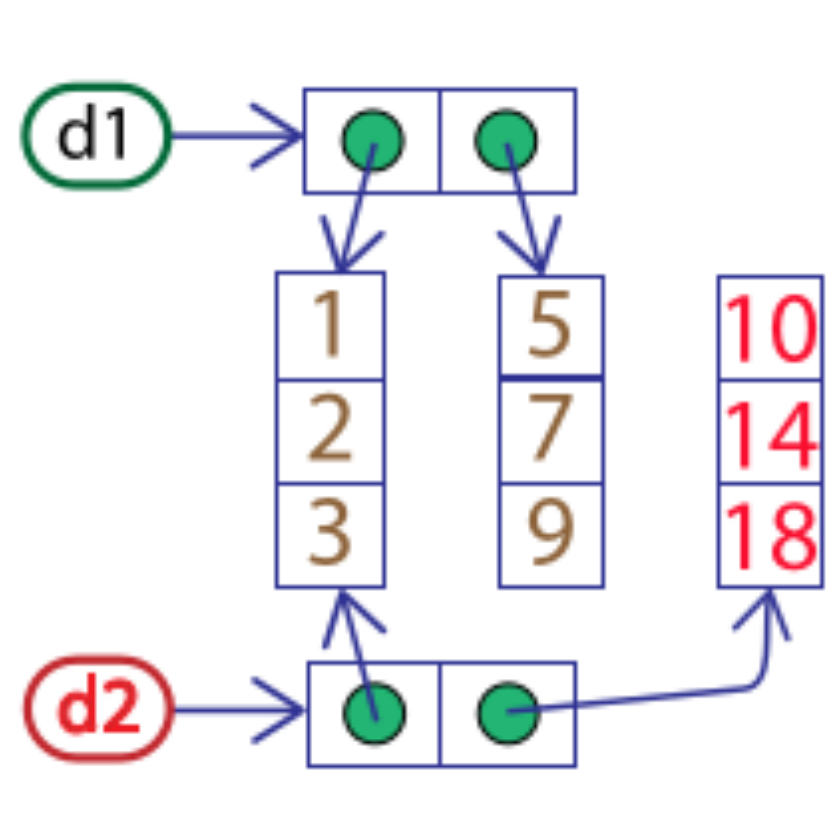

In [56]:
library(png)
library(grid)
img <- readPNG("./images/data.frame.png")     # effect of modifying a column
grid.raster(img)

---

## 09 - RANDOM
With the `sample` function , data can be selected at random. The syntax is:
`sample(x, size, replace = FALSE, prob = NULL)`.

Parameters are:
* x: The vector or object from which you want to sample.
* size: The number of items to sample.
* replace: indicates whether sampling is done with replacement (TRUE) or without replacement (FALSE). Default is FALSE.
* prob: A vector of probabilities that specifies the probability of selecting each element in x.

# arrivato a pagina 7 di 16, parte 4